In [1]:
# Decision Tree Regression

# Data Preprocessing Template

using DataFrames
using CSV
using Random
using DecisionTree

Random.seed!(0)

# Importing the dataset
df = CSV.File("Position_Salaries.csv") |> DataFrames.DataFrame!;

In [2]:
model = DecisionTreeClassifier()

DecisionTreeClassifier
max_depth:                -1
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  nothing
root:                     nothing

In [34]:
X = float.(collect(reshape(df.Level, (length(df.Level), 1))));
y = float.(collect(df.Salary));

In [35]:
fit!(model, X, y)

DecisionTreeClassifier
max_depth:                -1
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [45000.0, 50000.0, 60000.0, 80000.0, 110000.0, 150000.0, 200000.0, 300000.0, 500000.0, 1.0e6]
root:                     Decision Tree
Leaves: 10
Depth:  6

In [36]:
print_tree(model)

Feature 1, Threshold 8.5
L-> Feature 1, Threshold 6.5
    L-> Feature 1, Threshold 4.5
        L-> Feature 1, Threshold 3.5
            L-> Feature 1, Threshold 2.5
                L-> Feature 1, Threshold 1.5
                    L-> 45000.0 : 1/1
                    R-> 50000.0 : 1/1
                R-> 60000.0 : 1/1
            R-> 80000.0 : 1/1
        R-> Feature 1, Threshold 5.5
            L-> 110000.0 : 1/1
            R-> 150000.0 : 1/1
    R-> Feature 1, Threshold 7.5
        L-> 200000.0 : 1/1
        R-> 300000.0 : 1/1
R-> Feature 1, Threshold 9.5
    L-> 500000.0 : 1/1
    R-> 1.0e6 : 1/1


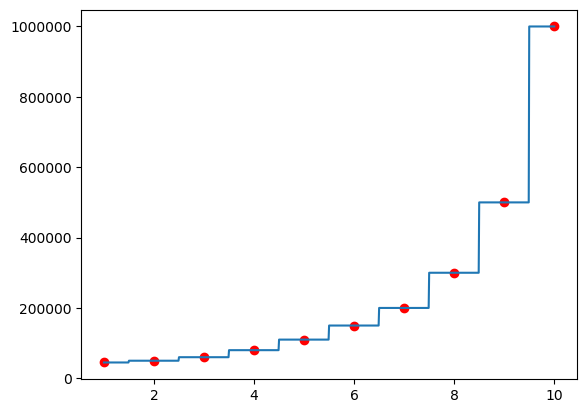

In [39]:
using PyPlot

X_grid = range(minimum(X), maximum(X), step = 0.01)
X_grid = reshape(collect(X_grid), (length(X_grid), 1))

scatter(X, y, color = :red)
plot(X_grid, predict(model, X_grid))
show()